## Grid explorer

In this notebook you will see how to:

- inspect the grid properties of GRIB data
- access the latitudes/longitudes of a field
- plot the gridpoints of a field
- interpolate GRIB data from one grid to another (regridding)
- extract the nearest gridpoint from a field

You will work with the following earthkit components: `earthkit-data`, `earthkit-plots` and `earthkit-regrid`.

You will work with a GRIB file containing global 1000 hPa temperature fields on 3 different grid types. 

First, fetch the file and list its contents.

In [1]:
import earthkit.data as ekd
ds = ekd.from_source("sample", "grids_3.grib")
ds.ls()

grids_3.grib:   0%|          | 0.00/33.0k [00:00<?, ?B/s]

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,t,isobaricInhPa,1000,20150422,1200,0,an,None,regular_ll
1,ecmf,t,isobaricInhPa,1000,20150422,1200,0,an,None,reduced_gg
2,ecmf,t,isobaricInhPa,1000,20150422,1200,0,an,None,healpix


Next, select the field you will inspect in the rest of the notebook. To try another grid type change the field index accordingly (between 0 and 2) and rerun the notebook.

In [2]:
f =  ds[2]
f.metadata("gridType")

'healpix'

### Inspecting the grid

In [3]:
f.dump(namespace="geography")

Nside,16
longitudeOfFirstGridPointInDegrees,45.0
gridPointPosition,4
orderingConvention,nested
gridType,healpix


The field's shape is derived from the geography.

In [4]:
f.shape

(3072,)

When you access the latitudes and longitudes via `to_latlon()` you get numpy arrays with the field's shape.

In [5]:
ll = f.to_latlon()
ll["lat"].shape, ll["lon"].shape

((3072,), (3072,))

In [6]:
ll["lon"]

array([ 45.    ,  47.8125,  42.1875, ..., 317.8125, 312.1875, 315.    ])

In [7]:
ll["lat"]

array([ 2.38801546,  4.78019185,  4.78019185, ..., -4.78019185,
       -4.78019185, -2.38801546])

The values when accessed via `to_numpy()` also have the field's shape.

In [8]:
f.to_numpy()

array([301.55168915, 301.5306015 , 302.52320099, ..., 299.71276855,
       298.80656433, 298.95476532])

### Plotting

This example shows you how to plot the original gridpoint positions of the field.

ECCODES WARNING :  Key gridSpec is not yet implemented. Work in progress...


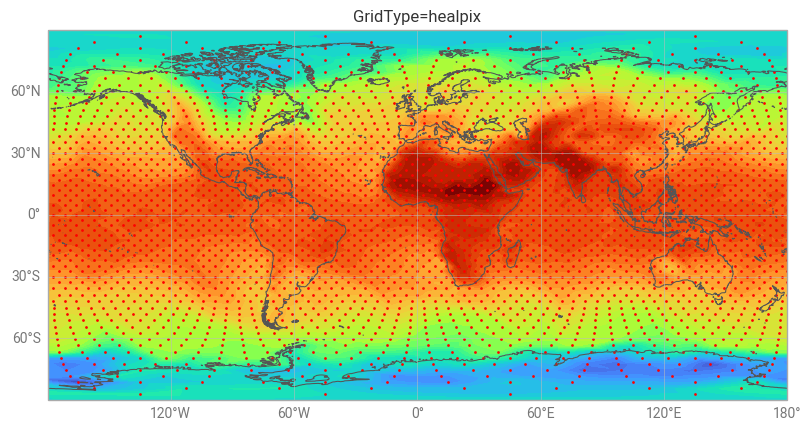

In [9]:
import earthkit.plots as ekp
  
chart = ekp.Map()
#chart = ekp.Map(domain=["Europe"])
chart.contourf(f, units="celsius", auto_style=True)
# plot the original grid points
chart.grid_points(f)
chart.title(f"gridType={f.metadata('gridType')}")
chart.coastlines()
chart.gridlines()

chart.show()

### Regridding

You can regrid data with ``erthkit-regrid``. At the moment, earthkit-regrid uses a set of pre-generated interpolation weights downloaded automatically from a remote repository managed by ECMWF. This means that only a limited set of grid-to-grid combinations are supported, the ones interpolation weights are available for. For the full list see: <https://earthkit-regrid.readthedocs.io/en/latest/inventory/index.html>

In [10]:
from earthkit.regrid import interpolate
from earthkit.data import FieldList

# the target grid is a global 10x10 degree regular latitude-longitude grid
grid = {"grid": [10,10]}

# regrid cannot read a single field but a fieldlist, so 
# we convert f into a fieldlist
ds_f =  FieldList.from_fields([f])

# perform interpolation for each field and add results
# to a new fieldlist stored in memory
ds_res = interpolate(ds_f, out_grid=grid, interpolation="linear")

Plot the original and interpolated fields.

ECCODES WARNING :  Key gridSpec is not yet implemented. Work in progress...


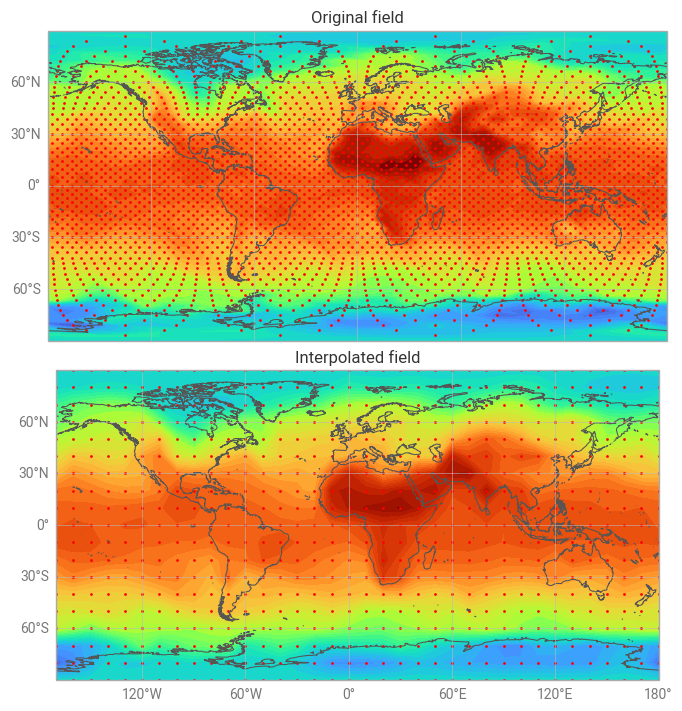

In [11]:
figure = ekp.Figure(rows=2, columns=1)

# the original field
subplot = figure.add_map(0, 0)
subplot.contourf(f, units="celsius", auto_style=True)
subplot.grid_points(f)
subplot.title("Original field")
# subplot.legend(label="")

# the interpolated field
subplot = figure.add_map(1, 0)
subplot.contourf(ds_res[0], units="celsius", auto_style=True)
subplot.grid_points(ds_res[0])
subplot.title("Interpolated field")
# subplot.legend(label="")

figure.coastlines()
figure.gridlines()

figure.show()